In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/FLAIR.nii.gz')
image_array = image_data.get_fdata()
image_data_2 = nib.load('../images/FLAIR_V2.nii.gz')

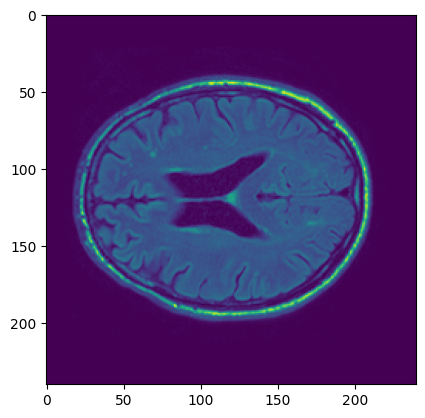

In [2]:
plt.imshow(image_array[:,:,25])

In [3]:
def histogram_matching(objective_data, origin_data,k):
    # Reshape the data arrays to 1D arrays
    objective_flat = objective_data.get_fdata().flatten()
    origin_flat = origin_data.get_fdata().flatten()


    reference_landmarks = np.percentile(objective_flat, np.linspace(0, 100, k))
    transform_landmarks = np.percentile(origin_flat, np.linspace(0, 100, k))

    piecewise_func = np.interp(origin_flat, transform_landmarks, reference_landmarks)


    transformed_data = piecewise_func.reshape(origin_data.shape)

    return transformed_data

In [4]:
res = histogram_matching(image_data, image_data_2,5)

Text(0.5, 1.0, 'Original')

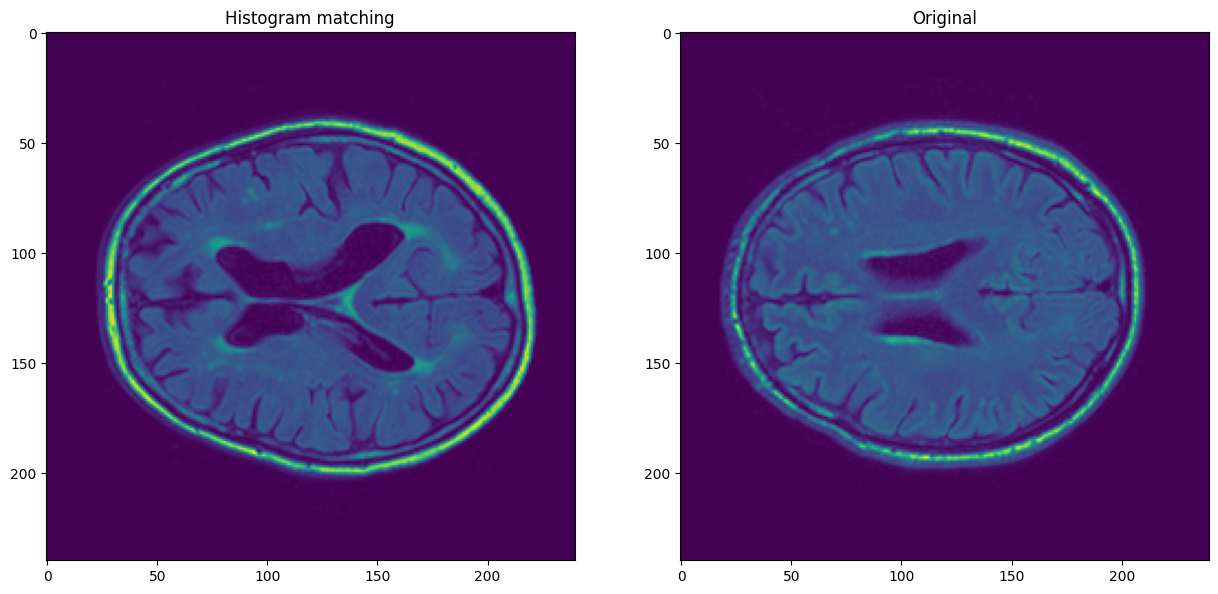

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.imshow(res[:,:,26])
ax1.set_title('Histogram matching')
ax2.imshow(image_array[:,:,26])
ax2.set_title('Original')

(array([4.5058e+04, 3.9583e+04, 3.8485e+04, 3.7613e+04, 3.6182e+04,
        3.3329e+04, 3.1384e+04, 2.9792e+04, 2.8269e+04, 2.8211e+04,
        2.9018e+04, 2.6318e+04, 2.7725e+04, 3.8883e+04, 6.0390e+04,
        8.3852e+04, 8.7424e+04, 6.9038e+04, 4.4986e+04, 2.6968e+04,
        1.7103e+04, 1.2088e+04, 9.8600e+03, 8.8360e+03, 7.9170e+03,
        7.5500e+03, 6.9800e+03, 6.7100e+03, 6.4070e+03, 6.1180e+03,
        5.8280e+03, 5.7300e+03, 5.3730e+03, 5.3010e+03, 5.1780e+03,
        4.9790e+03, 4.6870e+03, 4.7890e+03, 4.5480e+03, 4.5520e+03,
        4.4840e+03, 4.5170e+03, 4.5780e+03, 4.4950e+03, 4.5050e+03,
        4.6830e+03, 4.6940e+03, 4.9030e+03, 5.0790e+03, 5.2660e+03,
        5.4040e+03, 5.6860e+03, 5.5430e+03, 5.2210e+03, 4.8380e+03,
        4.3480e+03, 3.6960e+03, 2.9710e+03, 2.3640e+03, 1.8290e+03,
        1.3250e+03, 1.0310e+03, 6.7600e+02, 5.3800e+02, 3.8900e+02,
        2.6800e+02, 2.0500e+02, 1.5300e+02, 1.3600e+02, 1.0000e+02,
        6.9000e+01, 5.7000e+01, 3.5000e+01, 2.80

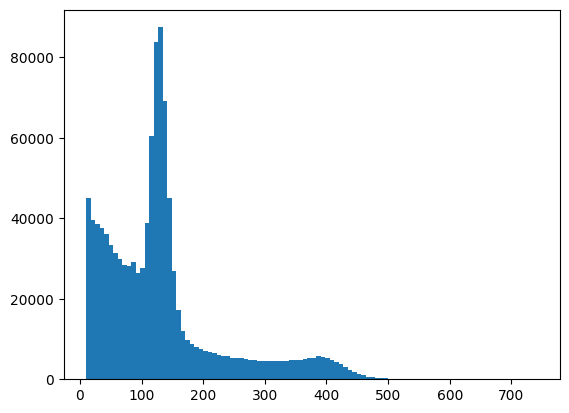

In [6]:
plt.hist(res[res>10].flatten(),100)